# Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf, month_plot, seasonal_plot, plot_predict
from sktime.utils.plotting import plot_series, plot_lags
from sktime.forecasting.naive import NaiveForecaster
from statsmodels.tsa.api import STL
pio.templates.default = 'plotly_white'

## a)

In [3]:
df  =pd.read_csv("time_series/ufo-sightings.csv",index_col=0)
display(df.head())
display(df.describe())
df["Date_time"] = [datetime.strptime(date, "%Y-%m-%d %H:%M:%S") for date in df["Date_time"]]

print("Date range:", min(df["Date_time"]),max(df["Date_time"]))
print("# of ufo sightings: ", len(df["Date_time"]))
fig = px.scatter_geo( data_frame=df.sort_values(by="Year"), lat=df["latitude"],lon=df["longitude"],hover_name="Country_Code", projection="natural earth",  animation_frame="Year")
fig.show()





Date_time date_documented  Year  Month  Hour  Season  \
0  1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1  1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2  1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3  1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4  1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region        Locale   latitude   longitude  \
0          USA   United States    Texas    San Marcos  29.883056  -97.941111   
1          USA   United States    Texas  Bexar County  29.384210  -98.581082   
2          GBR  United Kingdom  England       Chester  53.200000   -2.916667   
3          USA   United States    Texas          Edna  28.978333  -96.645833   
4          USA   United States   Hawaii       Kaneohe  21.418056 -157.803611   

  UFO_shape  length_of_encounter_seconds Encounter_Duration  \
0  Cylinder                       2700.0         45 minutes   
1     Light                       7200.0            1-2 hrs   
2    Circle                         20.0         20 seconds   
3    Circle                         20.0           1/2 hour   
4     Light                        900.0         15 minutes   

                                         Description  
0  This event took place in early fall around 194...  
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  
2  Green/Orange circular disc over Chester&#44 En...  
3  My older brother and twin sister were leaving ...  
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...

Year         Month          Hour      latitude     longitude  \
count  80328.000000  80328.000000  80328.000000  80328.000000  80328.000000   
mean    2003.850463      6.835026     15.525172     38.124963    -86.772015   
std       10.426547      3.234876      7.753750     10.469146     39.697805   
min     1906.000000      1.000000      0.000000    -82.862752   -176.658056   
25%     2001.000000      4.000000     10.000000     34.134722   -112.073333   
50%     2006.000000      7.000000     19.000000     39.412500    -87.903611   
75%     2011.000000      9.000000     21.000000     42.788333    -78.755000   
max     2014.000000     12.000000     23.000000     72.700000    178.441900   

       length_of_encounter_seconds  
count                 8.032800e+04  
mean                  9.017336e+03  
std                   6.202322e+05  
min                   1.000000e-03  
25%                   3.000000e+01  
50%                   1.800000e+02  
75%                   6.000000e+02  
max                   9.783600e+07

Date range: 1906-11-11 00:00:00 2014-05-08 18:45:00
# of ufo sightings:  80328


In [4]:
df_count = df.groupby(["Year","Country"]).size().reset_index(name="count")
px.scatter(df_count,x="Year",y="count",color="Country")

## b)

first three USA:
                  Country  count
Date_time                       
1910-03-31  United States      1
1910-06-30  United States      1
1910-09-30  United States      0
last Three:
                  Country  count
Date_time                       
2013-12-31  United States   1987
2014-03-31  United States   1456
2014-06-30  United States    638
first three Australia:
              Country  count
Date_time                   
1958-06-30  Australia      1
1958-09-30  Australia      0
1958-12-31  Australia      0
last Three:
              Country  count
Date_time                   
2013-12-31  Australia      9
2014-03-31  Australia      9
2014-06-30  Australia      5


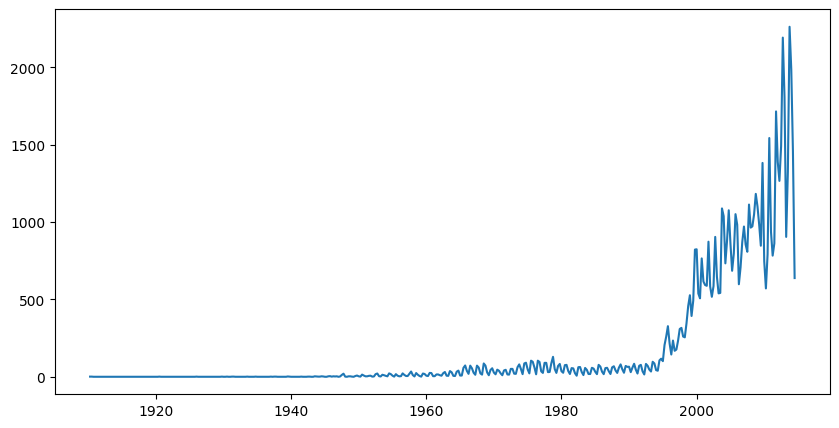

In [7]:
df_quaterly = df.set_index("Date_time")
df_quaterly = df_quaterly.groupby("Country").resample('QE').size()
df_quaterly = df_quaterly.reset_index(name="count")
df_quaterly.set_index("Date_time",inplace=True)
print("first three USA:")
print(df_quaterly[df_quaterly["Country"]=="United States"].head(3))
print("last Three:")
print(df_quaterly[df_quaterly["Country"]=="United States"].tail(3))


print("first three Australia:")
print(df_quaterly[df_quaterly["Country"]=="Australia"].head(3))
print("last Three:")
print(df_quaterly[df_quaterly["Country"]=="Australia"].tail(3))
# display(df_quaterly)

us_data = df_quaterly[df_quaterly["Country"]=="United States"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(us_data.index,us_data["count"])

## c)

In [71]:
ts_m = pd.read_csv("time_series/ts-monthly-10yrs.csv.")
ts_y = pd.read_csv("time_series/ts-yearly.csv.")
print(ts_m["country"].unique(),ts_y["country"].unique())
display(ts_m.head())

display(ts_m.describe())

display(ts_y.tail())
fig1 = px.scatter(ts_y,x="time",y="count",color="country")
fig1.show()
fig = px.scatter(ts_m,x="time",y="count",color="country")

fig.show()
display(ts_y.describe())
for col in ts_m.columns:

    print(type(ts_m[col][0]))
## andere start zeiten, monthly zeigt eine oszillation (ca. jährlich)
## die 

['AUS' 'CAN' 'GBR' 'IND' 'USA' 'GLOBAL'] ['AUS' 'CAN' 'GBR' 'IND' 'USA' 'GLOBAL']


country  index                       time  count total_encounter_duration
0     AUS      0  1993-01-01 00:00:00+00:00      1          0 days 00:01:00
1     AUS      1  1993-02-01 00:00:00+00:00      1          0 days 00:08:00
2     AUS      2  1993-03-01 00:00:00+00:00      0          0 days 00:00:00
3     AUS      3  1993-04-01 00:00:00+00:00      0          0 days 00:00:00
4     AUS      4  1993-05-01 00:00:00+00:00      0          0 days 00:00:00

index        count
count  1512.000000  1512.000000
mean    125.500000    90.915344
std      72.769629   156.981022
min       0.000000     0.000000
25%      62.750000     1.000000
50%     125.500000     8.000000
75%     188.250000   130.250000
max     251.000000   893.000000

country  index                       time  count  \
458  GLOBAL    100  2010-01-01 00:00:00+00:00   4158   
459  GLOBAL    101  2011-01-01 00:00:00+00:00   4977   
460  GLOBAL    102  2012-01-01 00:00:00+00:00   7191   
461  GLOBAL    103  2013-01-01 00:00:00+00:00   6914   
462  GLOBAL    104  2014-01-01 00:00:00+00:00   2208   

      total_encounter_duration  
458  1064 days 12:03:08.700000  
459   137 days 06:55:12.650000  
460   787 days 12:32:20.870000  
461   241 days 08:02:10.770000  
462    21 days 15:05:41.530000

index        count
count  463.000000   463.000000
mean    41.345572   335.533477
std     27.201457  1049.452433
min      0.000000     0.000000
25%     19.000000     1.000000
50%     38.000000     8.000000
75%     61.000000   135.000000
max    104.000000  7191.000000

<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>


## d)

time
1993-01-01 00:00:00+00:00    1
1993-02-01 00:00:00+00:00    1
1993-03-01 00:00:00+00:00    0
1993-04-01 00:00:00+00:00    0
1993-05-01 00:00:00+00:00    0
                            ..
2013-08-01 00:00:00+00:00    0
2013-09-01 00:00:00+00:00    3
2013-10-01 00:00:00+00:00    1
2013-11-01 00:00:00+00:00    4
2013-12-01 00:00:00+00:00    4
Name: count, Length: 252, dtype: int64

0 AUS
1 CAN
2 GBR
1 IND
2 USA
3 GLOBAL


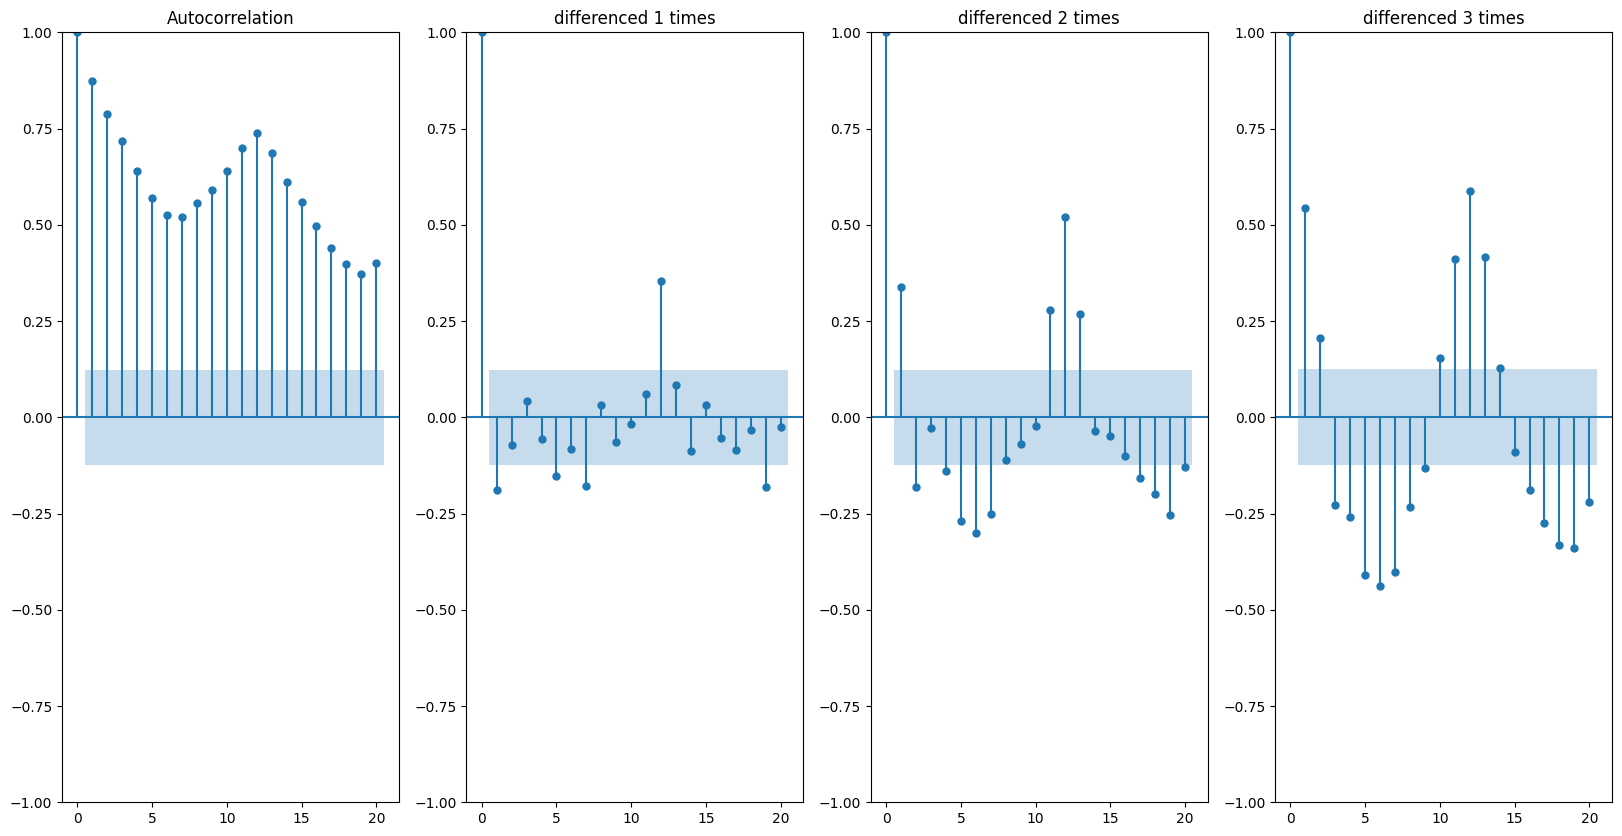

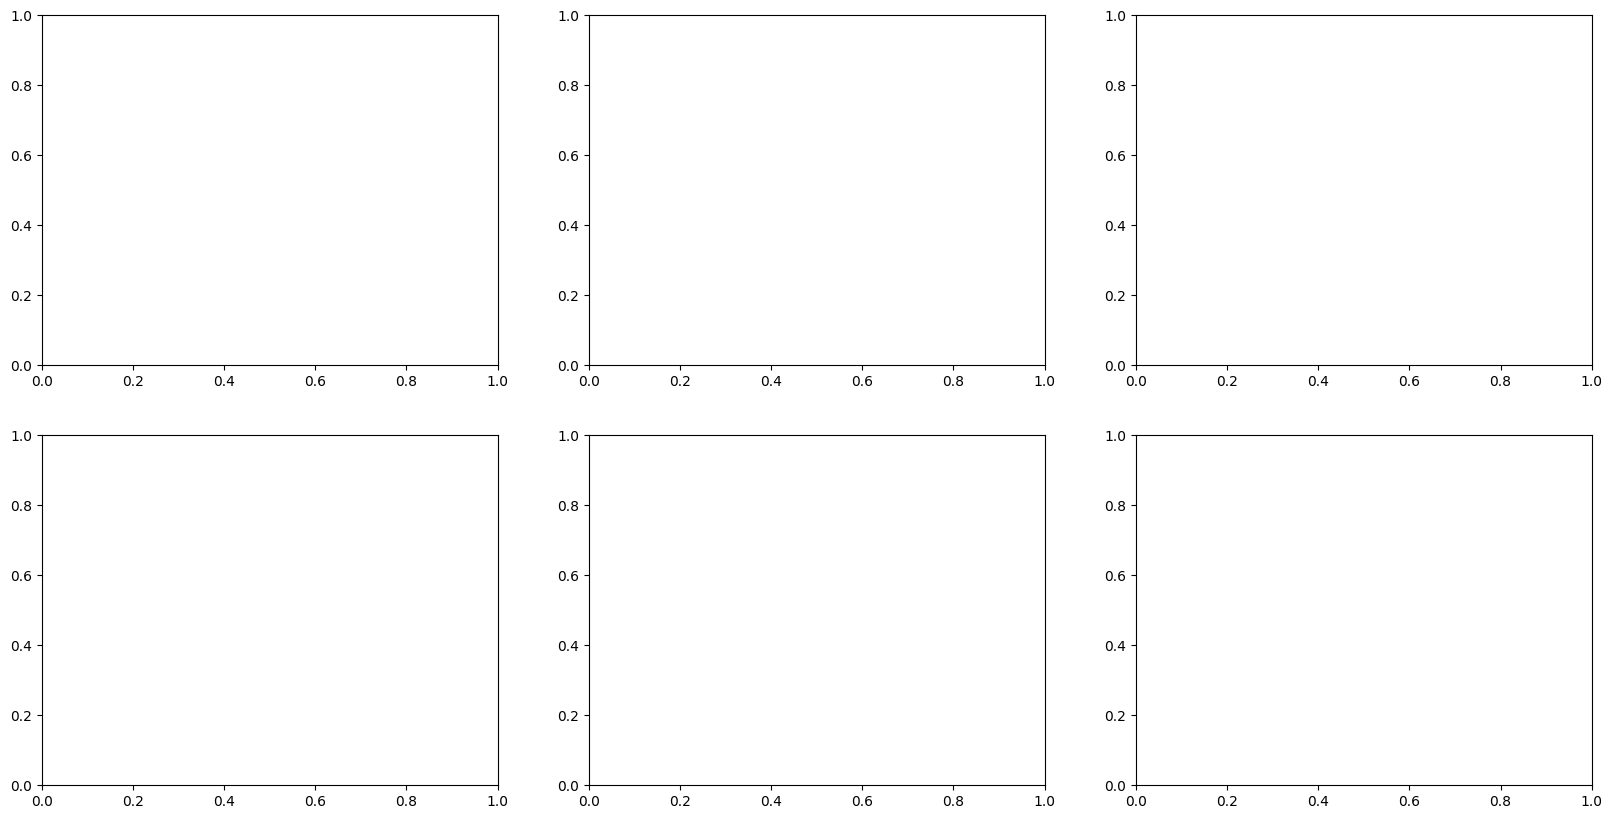

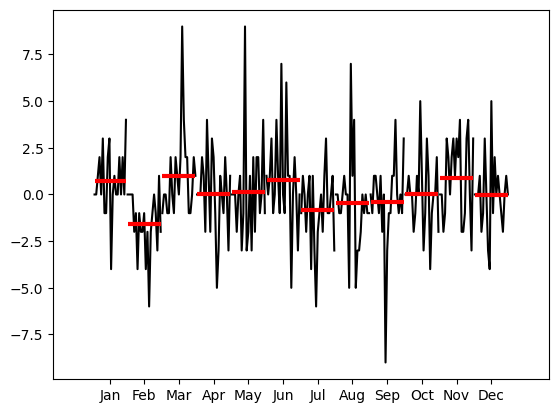

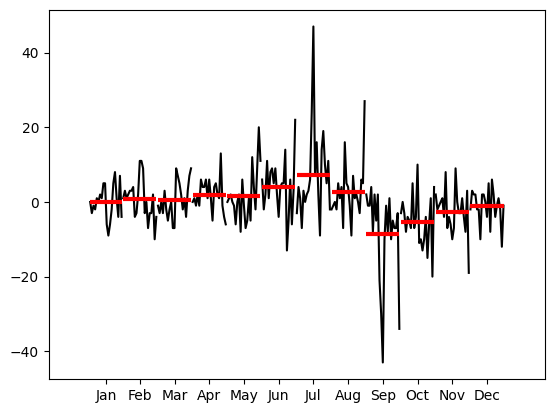

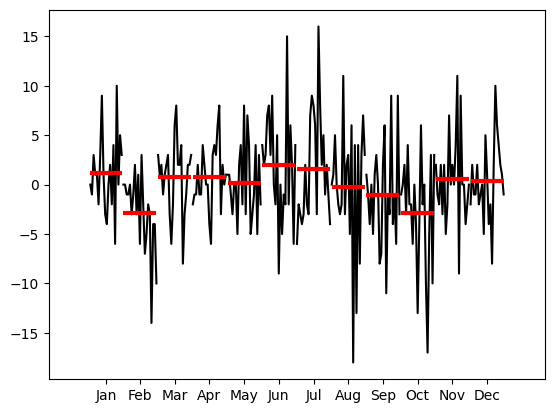

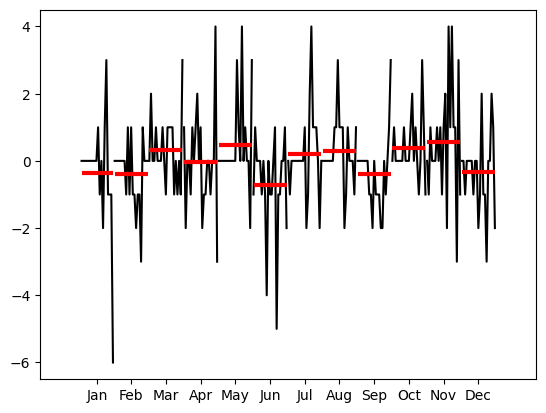

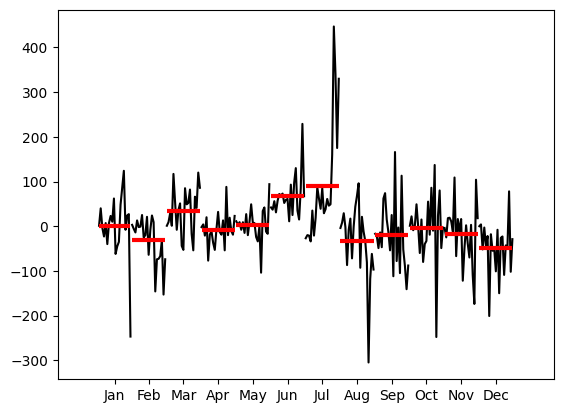

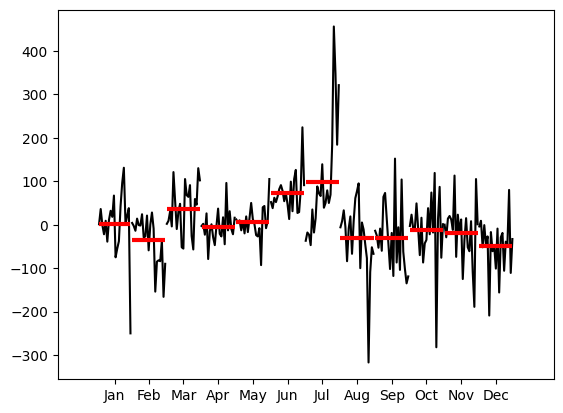

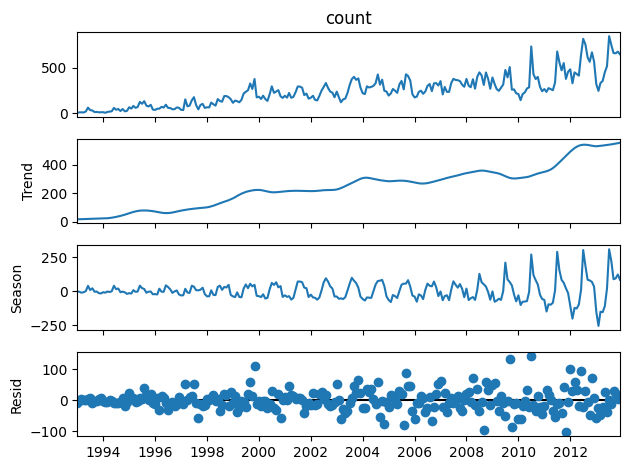

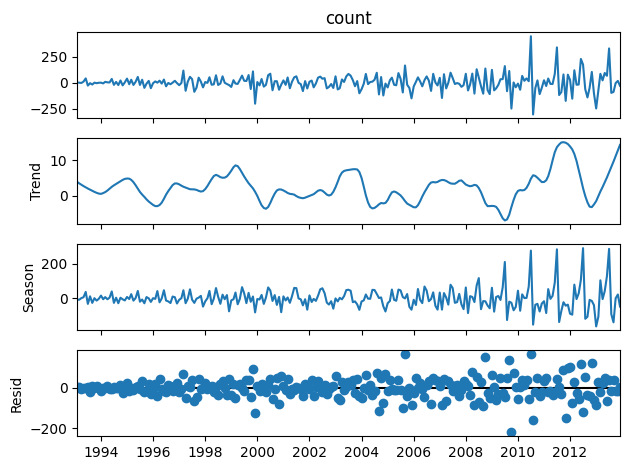

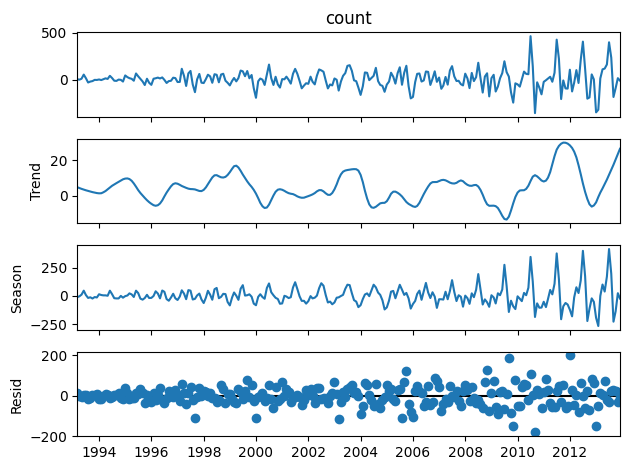

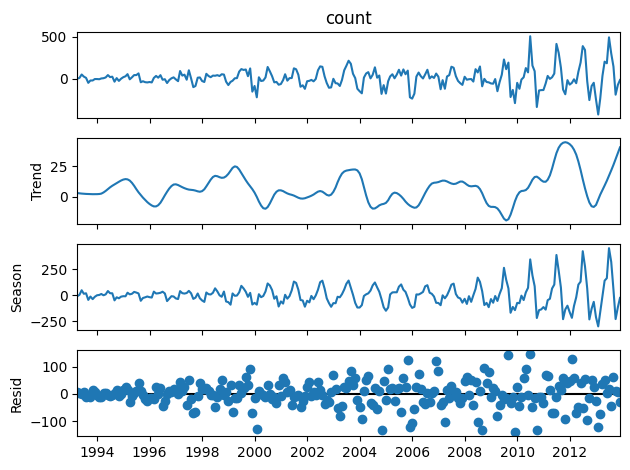

In [74]:
ts_m = pd.read_csv("time_series/ts-monthly-10yrs.csv.")

def plot_ma(series, ms: list[int]):
    f = go.Figure()
    f.add_trace(go.Scatter(x=series.index, y=series, name='Original'))
    for m in ms:
        f.add_trace(go.Scatter(x=series.iloc[m:-m].index, y=series.rolling(m, center=True).mean(), name=f'{m}-MA'))
    return f
# ma-plots 
ts_m["time"] = pd.to_datetime(ts_m["time"], format = '%Y-%m-%d %H:%M:%S%z')
ts_m.set_index("time",inplace=True)
fig = plot_ma(ts_m[ts_m["country"]=="AUS"]["count"],[3,5,7])
fig.show()
display(ts_m[ts_m["country"]=="AUS"]["count"]) 

# autocorrelation-plots 
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
plot_acf(ts_m[ts_m["country"]=="USA"]["count"], lags=20, bartlett_confint=False, ax=axs[0])
for d in [1, 2, 3]:
    plot_acf(ts_m[ts_m["country"]=="USA"]["count"].diff(d).dropna(), lags=20, bartlett_confint=False, ax=axs[d])
    axs[d].set_title(f'differenced {d} times')
# seasonal
# data once differeced




countries = ts_m["country"].unique()


c=0
for i in range(2):
    for j in range(3):

        country = countries[c]
        print(j+i,country)
        df_seasonal = ts_m[ts_m["country"]==country]["count"].diff(1).dropna()
        month_plot(df_seasonal)
        c+=1
        
df_stl_0 = ts_m[ts_m["country"]=="USA"]["count"]
decomp = STL(df_stl_0,period=12).fit()
decomp.plot()

for d in [1,2,3]:

    df_stl = ts_m[ts_m["country"]=="USA"]["count"].diff(d).dropna()
    decomp = STL(df_stl,period=12).fit()
    fig3 = decomp.plot()
 





## e)

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization f

1.7610732828993527


c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihoo

9.040900172111883


c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA p

2.6676180021071025


c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as 

127.16124997379679


c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found.

1.7163010862052894


c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\finnv\envs\uni\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_ret

125.37664745511269


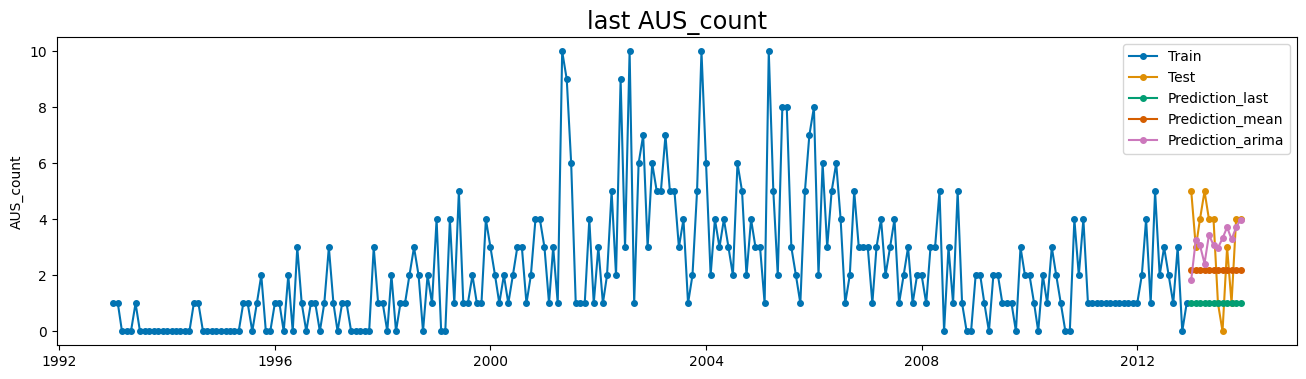

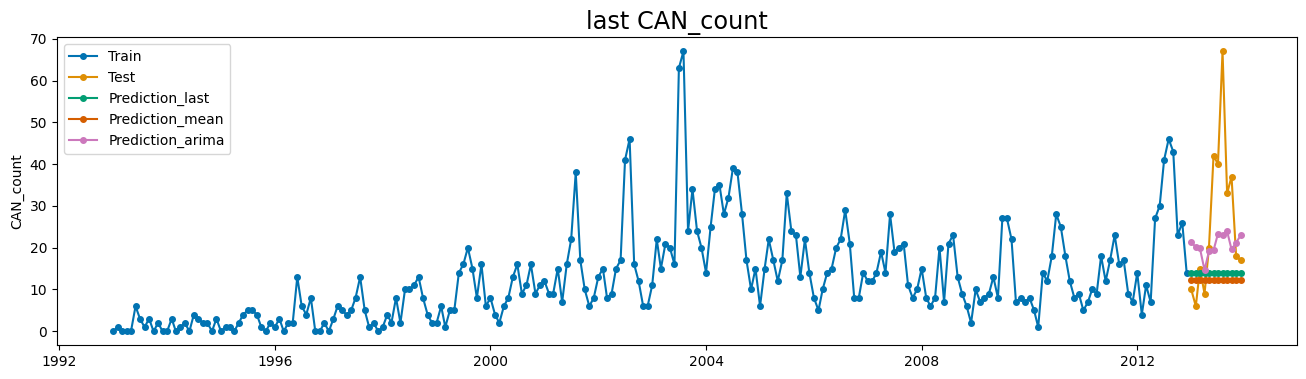

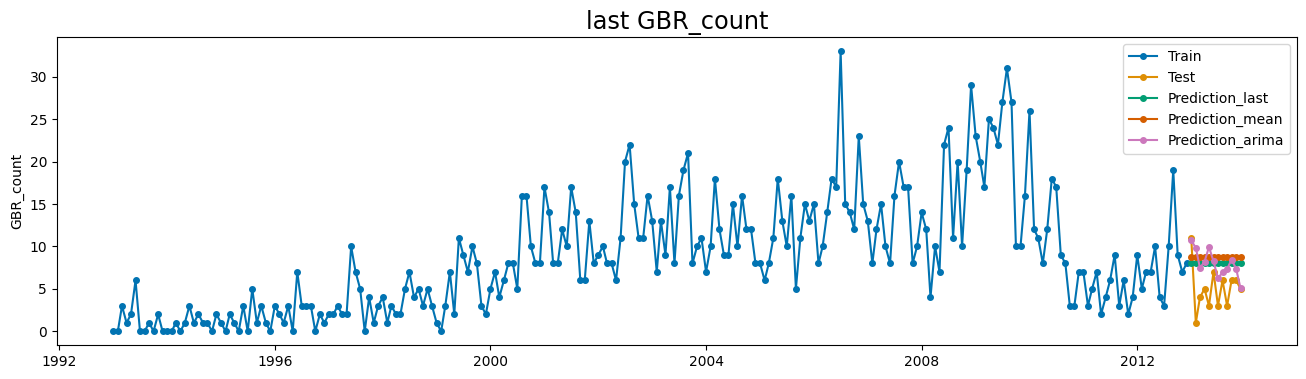

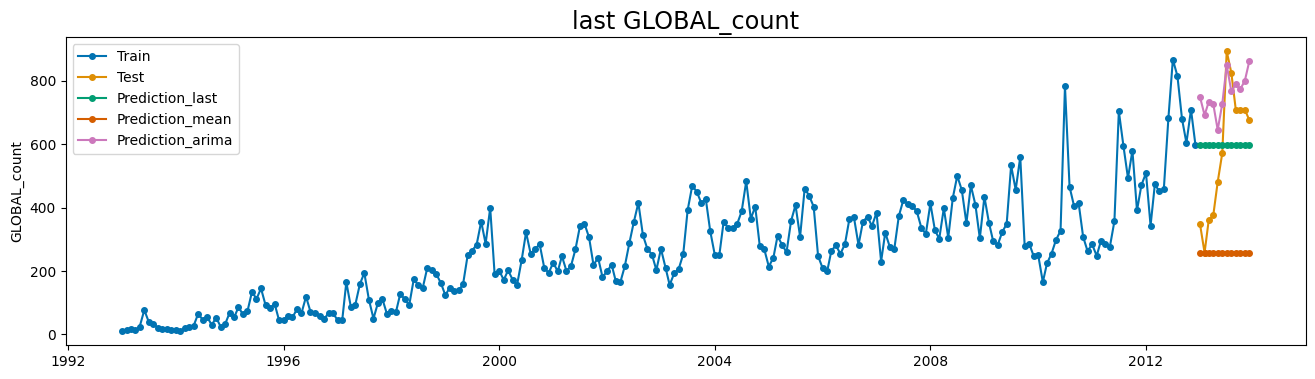

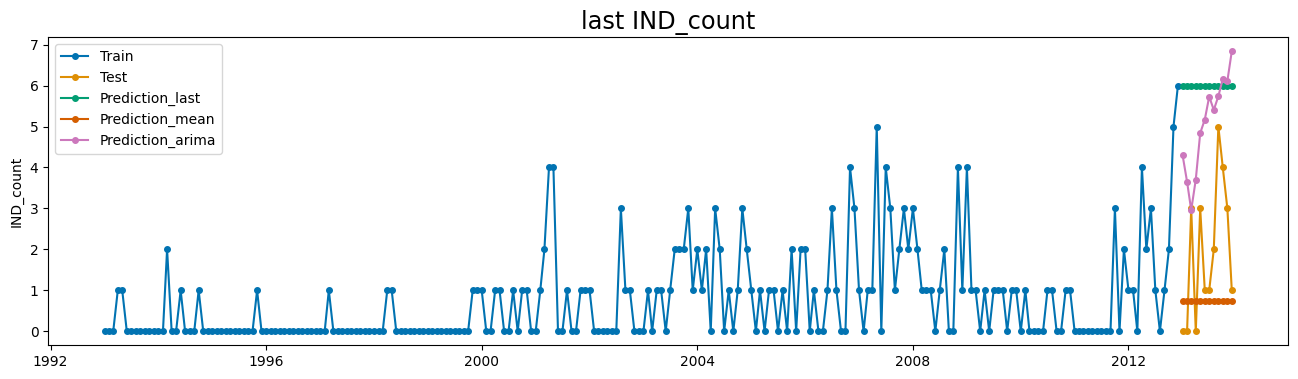

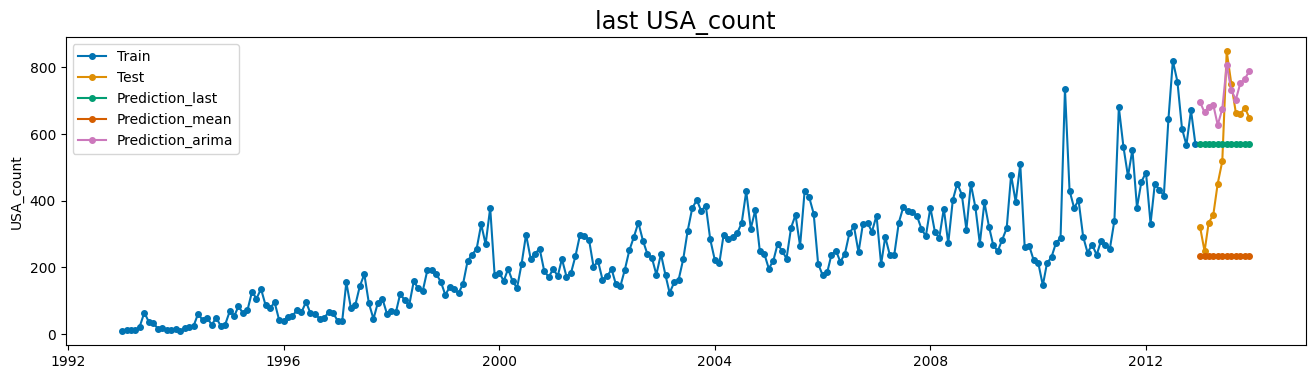

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product
def evaluate_forecast(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

p = range(1, 12,3)
d = range(0, 4)
q = range(1, 12,3)
results =[]

params = list(product(p, d, q))

df_test = pd.read_csv("time_series/ts-test.csv",index_col="time",parse_dates=["time"]).drop("index",axis=1)
df_train = pd.read_csv("time_series/ts-train.csv",index_col="time",parse_dates=["time"]).drop("index",axis=1)


for country in ['AUS_count', 'CAN_count', 'GBR_count', 'GLOBAL_count', 'IND_count',
       'USA_count']:
    df_test[country].index = pd.PeriodIndex(df_test[country].index, freq="M")
    df_train[country].index = pd.PeriodIndex(df_train[country].index, freq="M")
    fh = ForecastingHorizon(df_test[country].index,is_relative=False)
    forecaster_mean = NaiveForecaster(strategy="mean")
    forecaster_mean.fit(df_train[country])
    forecaster_last = NaiveForecaster(strategy="last")
    forecaster_last.fit(df_train[country])


    predict_mean = forecaster_mean.predict(fh)

    predict_last = forecaster_last.predict(fh)


    

    rmse_last = np.sqrt(mean_squared_error(df_test[country], predict_last))
    mae_last = mean_absolute_error(df_test[country], predict_last)
    mape_last = np.mean(np.abs((df_test[country] - predict_last) / df_test[country])) * 100

    results.append({"country": country,
                   "model": "last",
                   "results": [rmse_last, mae_last, mape_last]}
)
    rmse_mean = np.sqrt(mean_squared_error(df_test[country], predict_mean))
    mae_mean = mean_absolute_error(df_test[country], predict_mean)
    mape_mean = np.mean(np.abs((df_test[country] - predict_mean) / df_test[country])) * 100
    results.append({"country": country,
                   "model": "mean",
                   "results": [rmse_mean, mae_mean, mape_mean]})

    best_rmse = 99999999
    best_params = None

    for pdq in params:

        forecaster_arima = ARIMA(order=pdq)
        fit = forecaster_arima.fit(df_train[country])
        predict_arima =forecaster_arima.predict(fh) 
        

        rmse, mae, mape = evaluate_forecast(df_test[country], predict_arima)
        

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = pdq    
    results.append({"country": country,
                   "model": "ARIMA",
                   "results": [best_rmse, mae, mape],
                   "params": best_params})
    
    plot_series(df_train[country], df_test[country], predict_last,predict_mean,predict_arima, labels=['Train', 'Test', 'Prediction_last','Prediction_mean','Prediction_arima'], title='last %s' %country)
    
    print(best_rmse)
    

In [75]:
# get all results for the report

RMSE_last = [res.get("results")[2] for res in results if res.get("model")=="last"]
RMSE_mean = [res.get("results")[2] for res in results if res.get("model")=="mean"]
RMSE_arima = [res.get("params") for res in results if res.get("model")=="ARIMA"]

country =  [res.get("country") for res in results if res.get("model")=="last"]

print(country)
for i in range(len(RMSE_last)):


    print(country[i], RMSE_arima[i],r"\\")



['AUS_count', 'CAN_count', 'GBR_count', 'GLOBAL_count', 'IND_count', 'USA_count']
AUS_count (1, 3, 4) \\
CAN_count (10, 1, 4) \\
GBR_count (4, 3, 4) \\
GLOBAL_count (10, 1, 1) \\
IND_count (1, 0, 10) \\
USA_count (10, 1, 1) \\
